In [ ]:
# apenas instalação de algumas bibliotecas
!pip install pypdf langchain_community openai
# pypdf -> permite transformar o pdf em txt
# langchain_community -> framework com algumas rotinas de criação de Agentes
# openai -> framwork para fazer a interface com a API da openAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58

In [ ]:
# @title Conectando na API
from openai import OpenAI
import getpass

# criando uma instância com a API para utilizar a key
api_key =  getpass.getpass("Enter your OpenAI API key: ")
client = OpenAI(api_key=api_key)

Enter your OpenAI API key: ··········


Tudo o que fizermos aqui poderíamos fazer em qualquer outra linguagem, bastaria utilizar os endpoints da API:

https://platform.openai.com/docs/guides/chat-completions/getting-started


In [ ]:
# @title Modelos disponíveis
for model in client.models.list():
    print(model.id)

text-embedding-3-small
tts-1-1106
dall-e-2
gpt-4-1106-preview
tts-1
tts-1-hd-1106
tts-1-hd
dall-e-3
whisper-1
text-embedding-ada-002
text-embedding-3-large
gpt-4-turbo
gpt-4-0125-preview
gpt-4-turbo-2024-04-09
gpt-3.5-turbo
gpt-4-turbo-preview
gpt-3.5-turbo-0125
gpt-3.5-turbo-0613
gpt-4o-mini
gpt-4o-mini-2024-07-18
gpt-3.5-turbo-1106
chatgpt-4o-latest
gpt-3.5-turbo-16k
gpt-3.5-turbo-instruct-0914
gpt-3.5-turbo-0301
gpt-4
gpt-4-0613
gpt-3.5-turbo-instruct
gpt-4o-2024-08-06
babbage-002
davinci-002
gpt-3.5-turbo-16k-0613
gpt-4o
gpt-4o-2024-05-13


In [ ]:
# @title 🗣️Hello world
# @markdown vamos gerar um texto com o modelo da openAi
response = client.chat.completions.create(
    messages=[{"role": "user", "content": 'Olá, tudo bem? estou fazendo um pequeno teste, ok?'}],
    model="gpt-4o-mini",


    # mostras as probabilidades
    logprobs=True,
    top_logprobs=20,

    seed=0
    )



print( response.choices[0].message.content )
print('\n')
print("Quantidade de tokens enviados:", response.usage.prompt_tokens)
print("Quantidade de tokens gerados:", response.usage.completion_tokens)

Olá! Tudo bem, sim. Pode fazer o seu teste! Estou aqui para ajudar.


[O que é Token?](https://platform.openai.com/tokenizer)

Modelar a linguagem para um criar representações matemáticas é um problema. Hoje, o token é uma forma de quebrar uma palavra para tentar criar uma representação para os radicais e os complementos dessa palavra


# Na prática, como esses tokens são gerados?

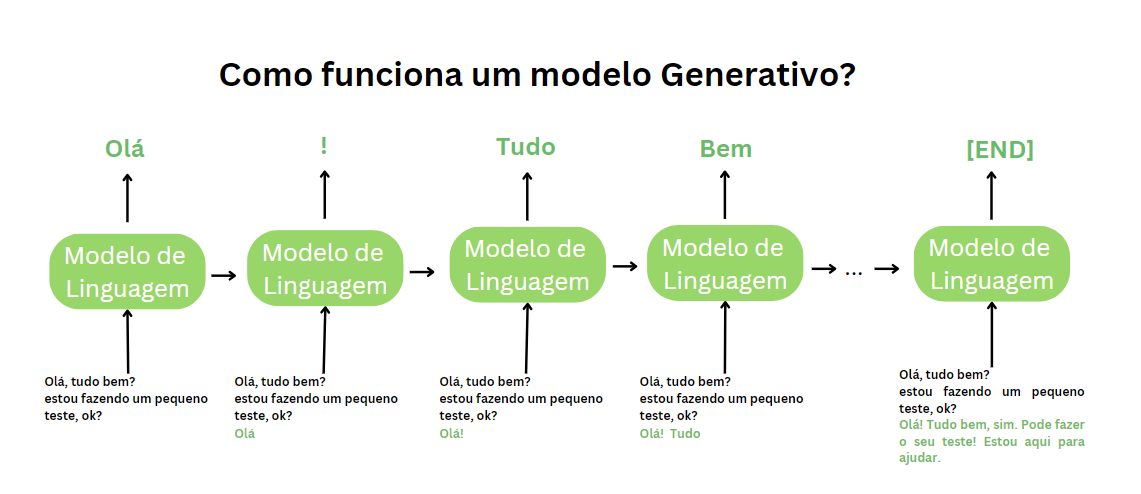

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65281 (\N{FULLWIDTH EXCLAMATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


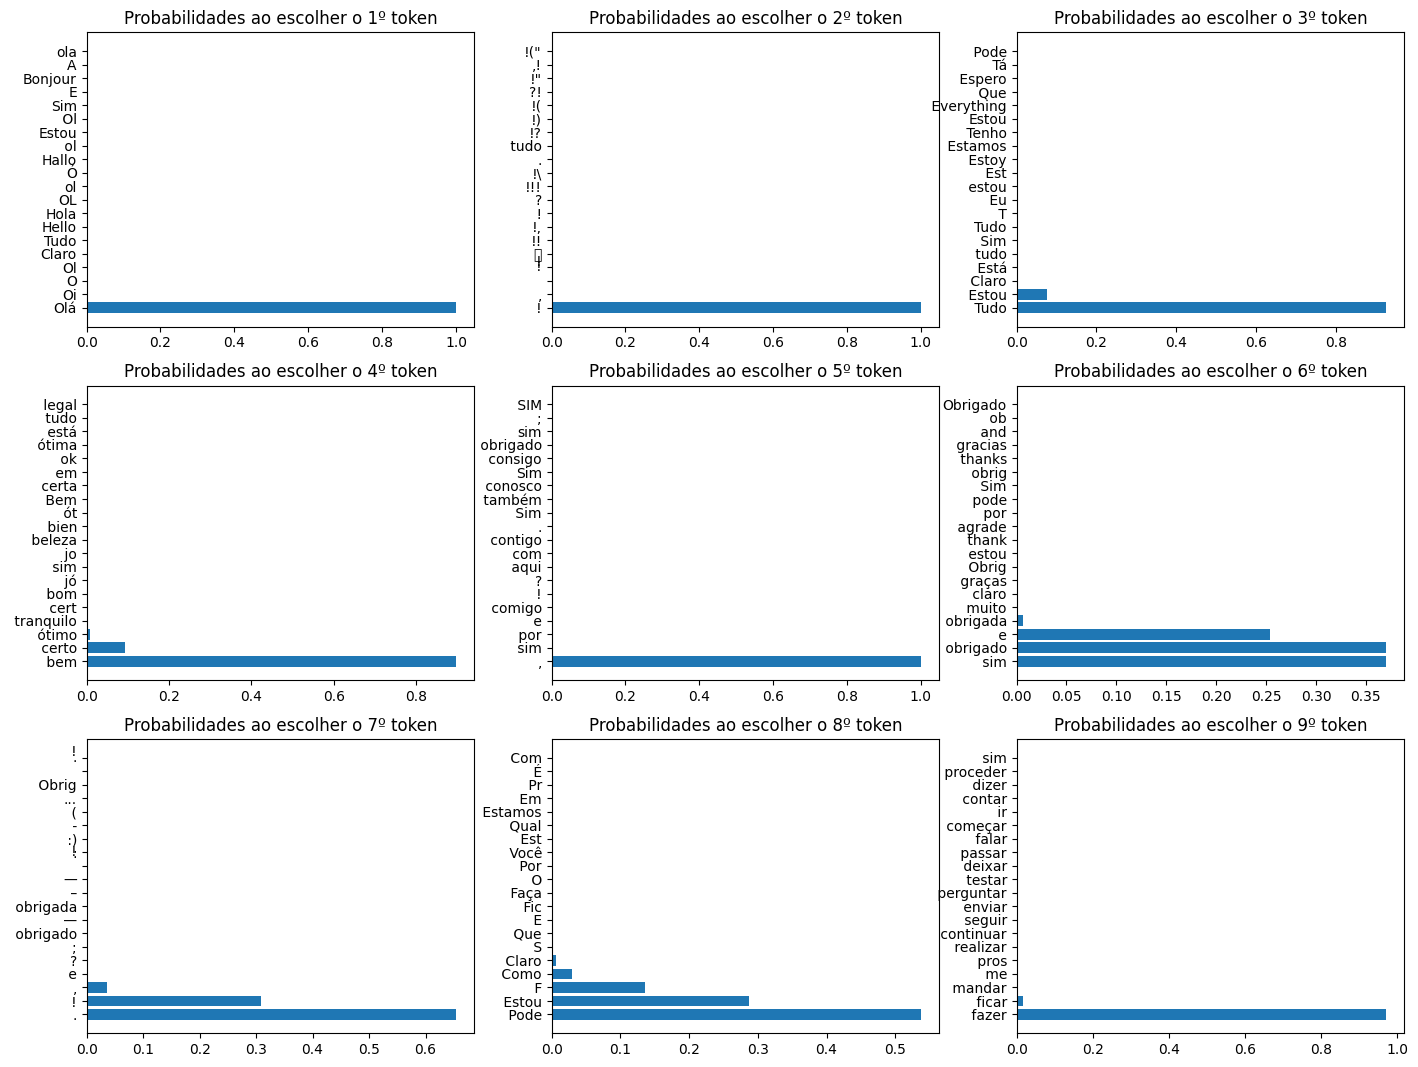

In [ ]:
# @title Entendendo como o Modelo escolhe um token
# @markdown essa parte apenas desenha as probabilidades dos tokens gerados da resposta do LLM
from math import exp
from matplotlib import pyplot as plt


fig, ax = plt.subplots(3,3,figsize=(17,13))

for token_i in range(min(len(response.choices[0].logprobs.content),9)):
    ax_i = ax[ token_i // 3, token_i % 3]

    tokens, probs = [], []
    for i in response.choices[0].logprobs.content[token_i].top_logprobs:
        tokens.append(i.token)
        probs.append(exp(i.logprob))

    ax_i.barh(tokens, probs)
    ax_i.set_title(f'Probabilidades ao escolher o {token_i+1}º token')

plt.show()


## Temperatura, Top-p e Top-K

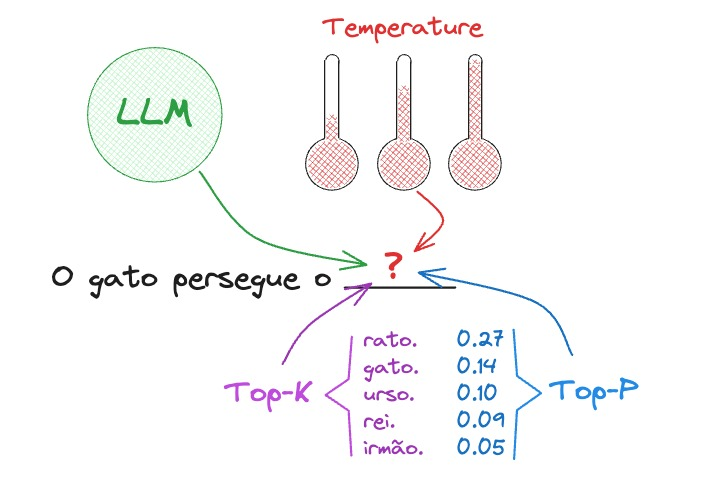

 - TOP-K:  torna a escolha do próximo token aleatória, dando liberdade de mais criatividade para o modelo
 - TOP-P: seleciona os tokens com base na soma das probabilidades dos tokens mais prováveis


In [ ]:

# @markdown Esse bloco de código cria algumas funções dinâmicas para representar a **Temperatura**, **TOP-K** e **TOP-P**
import ipywidgets as widgets
from IPython.display import display
import torch
import matplotlib.pyplot as plt
import numpy as np

# Sliders para temperatura, Top-K e Top-P
temperatura = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Temperatura:')
top_k = widgets.IntSlider(value=20, min=1, max=20, step=1, description='Top-K:')
top_p = widgets.FloatSlider(value=1, min=0.1, max=1, step=0.1, description='Top-P:')

output = widgets.Output()  # Widget de output para atualizar o gráfico

def on_change(change):
    with output:
        # Limpa o output para atualizar o gráfico
        output.clear_output(wait=True)

        # Tensor de exemplo (logits do modelo)
        resultado_modelo = torch.tensor([0.8506, 0.9084, 0.2804, 0.1252, 0.6720, 0.1741, 0.2447, 0.7492, 0.5051,
                                         0.7892, 0.6658, 0.9692, 0.0952, 0.8572, 0.1886, 0.8421, 0.2853, 0.1307,
                                         0.3981, 0.2882])

        # Criação da figura
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))

        # Número de categorias (tokens)
        n = len(resultado_modelo)
        indices = np.arange(n)  # Índices para os tokens
        largura = 0.35  # Largura das barras

        # Probabilidades com temperatura padrão (1.0)

        ax.bar(indices, [i.item() for i in torch.softmax(resultado_modelo, dim=-1)], width=largura, label="Temperatura 1", color='green', alpha=0.8)

        # Ajustando a temperatura
        resultado_temp = resultado_modelo / temperatura.value
        output_temp = torch.softmax(resultado_temp, dim=-1)

        # Gráfico com temperatura ajustada
        ax.bar(indices + largura, output_temp, width=largura, label=f"Temperatura {temperatura.value}", color='blue', alpha=0.3)

        # Aplicando Top-K
        output_values_top_k, output_indices_top_k = torch.topk(output_temp, k=min(top_k.value, len(output_temp)))

        # Gráfico com Top-K aplicado
        ax.bar(output_indices_top_k + largura, output_values_top_k, width=largura, label=f"Top-K {top_k.value}", color='red', alpha=0.8)

        # Aplicando Top-P
        sorted_probs, sorted_indices = torch.sort(output_temp, descending=True)
        cumulative_probs = torch.cumsum(sorted_probs, dim=-1)

        # Filtrar os tokens cuja soma cumulativa atinge Top-P
        top_p_mask = cumulative_probs <= top_p.value
        top_p_probs = sorted_probs * top_p_mask
        #top_p_probs /= top_p_probs.sum()  # Normaliza para garantir que as probabilidades somem 1

        # Gráfico com Top-P aplicado
        ax.bar(sorted_indices[top_p_mask] + largura, top_p_probs[top_p_mask], width=largura, label=f"Top-P {top_p.value}", color='purple', alpha=0.5)

        # Configurações do gráfico
        ax.set_xticks(indices + largura / 2)
        ax.set_xticklabels([f'Token {i+1}' for i in range(n)])
        ax.set_title('Distribuição de Probabilidades - Comparativo entre Temperaturas, Top-K e Top-P')
        ax.set_xlabel('Tokens')
        ax.set_ylabel('Probabilidade')
        ax.tick_params(axis='x', rotation=90)
        ax.legend()
        plt.ylim(0, 0.16)
        plt.show()

# Observadores para interagir dinamicamente
temperatura.observe(on_change, names='value')
top_k.observe(on_change, names='value')
top_p.observe(on_change, names='value')

# Exibe os sliders e o gráfico
display(temperatura, top_k, top_p, output)


FloatSlider(value=1.0, description='Temperatura:', max=2.0, min=0.1)

IntSlider(value=20, description='Top-K:', max=20, min=1)

FloatSlider(value=1.0, description='Top-P:', max=1.0, min=0.1)

Output()

### Alucinação

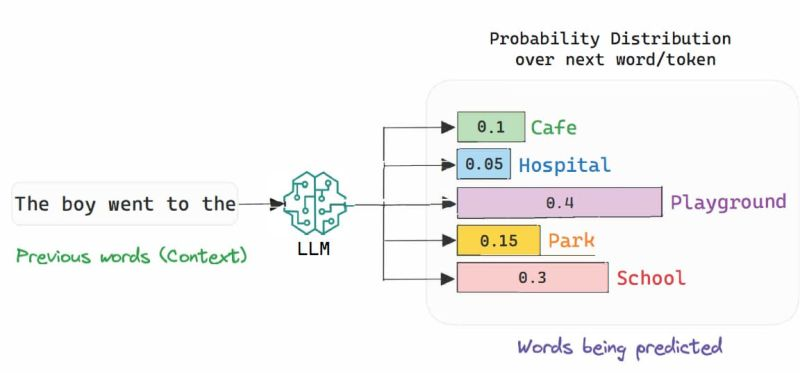

O modelo tende a responder com os tokens com as maiores probabilidades, mas nem sempre o token mais provável para o modelo torna a frase adequada




# Utilizando turnos

In [ ]:
# vamos mudar o system prompt?
# --> No treinamento do modelo, o system prompt é uma forma de dizer como o modelo deveria se comportar

respons2 = client.chat.completions.create(
    messages=[
        {"role": "system", "content": 'Você é um assitente, sempre que alguém fazer algum comentário você deve fazer um elogio ao usuário'},
        {"role": "user", "content": 'Olá, tudo bem? sou um estudante e estou fazendo um pequeno teste, ok?'}
        ],
    model="gpt-4o-mini",

    logprobs=True, # mostras as probabilidades
    top_logprobs=20,
    seed=0
    )

print( respons2.choices[0].message.content )

Olá! Tudo ótimo, obrigado por perguntar. É incrível que você esteja se dedicando aos estudos e realizando testes! Continue assim! 😊


#CASE -  O que os PDF poderiam responder?

In [ ]:
# TODO: fazer a pergunta com todos os pdf para o GPT - explicar por que eu nao deveria enviar o documento todo para o GPT

# TODO: subir o arquivo com imagem por que deu problema? - lembrar do usuário que vai utilizar la na ponta

In [ ]:
# @title 📚 Vamos carregar os arquivos?
# @markdown aqui a ideia é carregar todos os arquivos que podem contribuir com a resposta e dividir em pedaços menores
chunk_size = 1500 # @param {"type":"integer","placeholder":"1000"}
chunk_overlap = 400 # @param {"type":"integer","placeholder":"300"}


import os
from langchain_community.document_loaders import PyPDFLoader, TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap, add_start_index=True,
    separators=["\n\n", "\n"]
)


data = []

for f in os.listdir("./data"):
    loader = None
    if f.endswith(".pdf"):
        loader = PyPDFLoader("./data/"+f)
    elif f.endswith(".txt"):
        loader = TextLoader("./data/"+f)
    else:
        continue


    docs = loader.load_and_split()
    docs = text_splitter.split_documents(docs)
    print("Arquivo encontrado:  ",f,"       Quantidade de chunks: ", len(docs))
    data.extend(docs)

print("Quantidade de chunks: ", len(data))


Arquivo encontrado:   Manual de Segurança para Sistemas Satélites.pdf        Quantidade de chunks:  56
Arquivo encontrado:   Manual de Segurança para Sistemas Satélites - Fornecedor.pdf        Quantidade de chunks:  54
Arquivo encontrado:   Norma de Gestão de Automação por RPA.txt        Quantidade de chunks:  38
Quantidade de chunks:  148


In [ ]:
# TODO: diferentes formas de dividir os chunks

In [ ]:
# @title 📃Amostrando os arquivos
import pandas as pd

def to_dict(item):
    result = {'page_content': item.page_content}
    result.update(item.metadata)
    return result

itens = [to_dict(doc) for doc in data]
df = pd.DataFrame(itens)

display(df)

for file_path in df.source.unique():
    print('\n\n','*'*100,'\n',file_path,'\n\n',df[ df['source'] == file_path].sample(1).page_content.values[0])

,page_content,source,page,start_index
0,Classificação da informação: Uso Interno \n \...,./files/Manual de Segurança para Sistemas Saté...,0.0,0
1,Sistemas Satélites Manual de Segurança \n \n...,./files/Manual de Segurança para Sistemas Saté...,1.0,0
2,6. Anexos e Referências ........................,./files/Manual de Segurança para Sistemas Saté...,1.0,734
3,Sistemas Satélites Manual de Segurança \n \n...,./files/Manual de Segurança para Sistemas Saté...,2.0,0
4,Sistemas Satélites Manual de Segurança \n \n...,./files/Manual de Segurança para Sistemas Saté...,3.0,0
...,...,...,...,...
221,Título\nNorma de Gestão de Automação por RPA\n...,./files/Norma de Gestão de Automação por RPA.txt,NaN,2744
222,c) Compartilhar as melhores práticas entre as ...,./files/Norma de Gestão de Automação por RPA.txt,NaN,3434
223,"IV.\nPlanejar a continuidade de negócio, confo...",./files/Norma de Gestão de Automação por RPA.txt,NaN,0
224,Título\nNorma de Gestão de Automação por RPA\n...,./files/Norma de Gestão de Automação por RPA.txt,NaN,714




 **************************************************************************************************** 
 ./files/Manual de Segurança para Sistemas Satélites.pdf 

 Sistemas Satélites  Manual de Segurança  
 
 
 
29/09/2021  Versão - 4.0 Página 11 
 
 
Classificação da informação: Uso Interno   
6) Verificar que tokens  de sessão baseados em cookies  possuem o atributo “ Secure”  
configurado . 
a. Controle ASVS : 3.4.1 . 
b. Aplicabilidade: todos os sistemas satélites.  
 
7) Verificar que tokens  de sessão baseados em cookies  possuem o atributo 
“HttpOnly”  configurado . 
a. Controle ASVS : 3.4.2 . 
b. Aplicabilidade: todos os sistemas satélites.  
 
8) Verificar que tokens  de sessão baseados em cookies  utilizam o atributo 
“SameSite”  para limitar a exposição a ataqu es CSRF . 
a. Controle ASVS : 3.4.3 . 
b. Aplicabilidade: todos os sistemas satélites.  
 
9) Verificar que tokens  de sessão baseados em cookies  utilizam o prefixo “__Host -“ 
para garantir confidencialidade ao coo

- Perguntas RPA:

1)Uma automação que utiliza linguagens de programação dentro de uma ferramenta homologada é considerada uma automação corporativa? 

2)Toda automação precisa de aprovação especificamente do Diretor responsável pelo tema na Cooperativa? Como deve ocorrer este processo?

3)Como deve ser feito monitoramento de execução de automações não corporativas que executam em background, como por exemplo automações em Python?

4)Pode tratar dados sensíveis dentro de automações? Se sim, como devem ser tratados dados sensíveis dentro das automações?

5)Qual o papel do CoE das centrais sobre o tema RPA? Quais as principais diferenças nos papeis e responsabilidades da Central e Cooperativas?



- Perguntas Sistemas Satélites:



1) Como posso identificar se um sistema se enquadra como Sistema Satélites?

2)Quais os principais requisitos na arquitetura e design do aplicativo?

3)Qual o procedimento de segurança necessário para se ter sistemas satélite no core bancário?

4)Quais os problemas de segurança em aplicações web deve ser verificadas?

5)Quais configurações da aplicação devem ser revisadas periodicamente?

In [ ]:
# pergunta a ser respondida
query = "Quais os tipos de robôs de RPA?"


In [ ]:
# Posso fazer uma busca...
df[df.page_content.str.contains('Robôs de RPA')]
# Mas e se o que eu desejo buscar não esteja nos documentos?

,page_content,source,page,start_index,embedding
179,amparado pela estrutura de Governança Corporat...,./files/Norma de Gestão de Automação por RPA.txt,NaN,2814,"[-0.04635515436530113, 0.045057374984025955, 0..."
182,"impessoal RPA;\nd) Criação de RPA, mediante ap...",./files/Norma de Gestão de Automação por RPA.txt,NaN,708,"[0.009603092446923256, 0.06481944769620895, 0...."
183,Identidades e Acessos e de acordo com o quadro...,./files/Norma de Gestão de Automação por RPA.txt,NaN,1416,"[-0.008360544219613075, 0.0801146999001503, 0...."


## Como vamos buscar a informação que contem a resposta? (Embeddings)

In [ ]:
# TODO: Explicação

In [ ]:
# @title  🧬Criando os embedding
import numpy as np
embedding_model_name = "text-embedding-3-small"

def get_embedding(text, model=embedding_model_name) -> list[float]:
    """
        Função para gerar um embedding a partir de um texto, usando o modelo da OPENAI.
    """
    return client.embeddings.create(input = [text], model=model).data[0].embedding



In [ ]:
# criando os embeddings para cada chunk
df['embedding'] = df.page_content.apply(lambda x: get_embedding(x, model=embedding_model_name))

In [ ]:
#import pandas as pd
#import numpy as np
#df = pd.read_pickle('sicred.pkl')
#df

,page_content,source,page,start_index,embedding
0,Classificação da informação: Uso Interno \n \...,./files/Manual de Segurança para Sistemas Saté...,0.0,0,"[-0.013874221593141556, 0.05322960391640663, 0..."
1,Sistemas Satélites Manual de Segurança \n \n...,./files/Manual de Segurança para Sistemas Saté...,1.0,0,"[0.006181290838867426, 0.06227078288793564, 0...."
2,6. Anexos e Referências ........................,./files/Manual de Segurança para Sistemas Saté...,1.0,734,"[0.02039957046508789, 0.04663091152906418, 0.0..."
3,Sistemas Satélites Manual de Segurança \n \n...,./files/Manual de Segurança para Sistemas Saté...,2.0,0,"[0.010708276182413101, 0.06738153845071793, 0...."
4,Sistemas Satélites Manual de Segurança \n \n...,./files/Manual de Segurança para Sistemas Saté...,3.0,0,"[-0.0009350121254101396, 0.08843137323856354, ..."
...,...,...,...,...,...
221,Título\nNorma de Gestão de Automação por RPA\n...,./files/Norma de Gestão de Automação por RPA.txt,NaN,2744,"[0.014510050415992737, 0.04293655604124069, 0...."
222,c) Compartilhar as melhores práticas entre as ...,./files/Norma de Gestão de Automação por RPA.txt,NaN,3434,"[0.0006645757821388543, 0.03076036460697651, 0..."
223,"IV.\nPlanejar a continuidade de negócio, confo...",./files/Norma de Gestão de Automação por RPA.txt,NaN,0,"[0.013365644961595535, 0.042487263679504395, 0..."
224,Título\nNorma de Gestão de Automação por RPA\n...,./files/Norma de Gestão de Automação por RPA.txt,NaN,714,"[0.008695043623447418, 0.04160109907388687, 0...."


In [ ]:
# se eu quisse saber os tipos de robos de rpa?

In [ ]:
# transformando em um vetor para facilitar o calculo de similaridade
embeddings = np.array(df.embedding.to_list())

In [ ]:

# criando o embedding da pergunta
emb_query = get_embedding(query, model=embedding_model_name)


In [ ]:
# buscando os trexos que podem responder a pergunta
similarities = (embeddings @ emb_query)

k = 3 # quantidade de trechos mais similares
top_k = similarities.argsort()[-k:]

In [ ]:
# O quanto similar é os chunks mais prováveis?
# OBS** o modelo tenta criar uma similaridade da resposta da pergunta
print("Os chunks mais prováveis que podem haver informações para responder são:")
for i, index_doc, similarity in zip(range(k), top_k, similarities[top_k]):
    print(f"    {i} - Índice: {index_doc}   Similaridade: {round(similarity,3)}")

Os chunks mais prováveis que podem haver informações para responder são:
    0 - Índice: 177   Similaridade: 0.722
    1 - Índice: 176   Similaridade: 0.734
    2 - Índice: 179   Similaridade: 0.804


In [ ]:
# mostrando os documentos mais similares
display(df.iloc[top_k])
for index, row in df.iloc[top_k].iterrows():
    print("*"*30,'Trecho ',index,"*"*30)
    print(row.page_content,'\n')

,page_content,source,page,start_index,embedding
177,"atividade do colaborador, necessitando de inte...",./files/Norma de Gestão de Automação por RPA.txt,NaN,1397,"[-0.03639772906899452, 0.07381467521190643, 0...."
176,Aplicação;\nProcesso\n-\nConjunto de ações par...,./files/Norma de Gestão de Automação por RPA.txt,NaN,739,"[-0.04073071479797363, 0.04991627857089043, 0...."
179,amparado pela estrutura de Governança Corporat...,./files/Norma de Gestão de Automação por RPA.txt,NaN,2814,"[-0.04635515436530113, 0.045057374984025955, 0..."


****************************** Trecho  177 ******************************
atividade do colaborador, necessitando de intervenção ou supervisão humana durante
sua execução. A execução de processos neste tipo de robô ocorre de maneira manual,
onde um operador dispara a execução do processo e precisa garantir que a finalização
tenha ocorrido de forma satisfatória;
-
Robô Não-Atendido - Os robôs não-atendidos são capazes de realizar as atividades
sem supervisão humana e tem como principal executar operações através de
acionamentos de eventos ou trabalhar em tarefas de forma agendada. Este tipo de
robô pode ter monitoramento remoto, onde não é necessário que um operador acesse
localmente o computador onde o robô está sendo executado, mas pode acompanhar
se as atividades atribuídas a este robô estão sendo executadas.
A tecnologia RPA (Robotic Process Automation) permite a automação de tarefas rotineiras
através de robôs de software. Eles executam processo de negócios baseados em regras, 

***

In [ ]:
# Juntando a lista dos documentos mais prováveis
'\n'.join(df.iloc[top_k].page_content.values)

'atividade do colaborador, necessitando de intervenção ou supervisão humana durante\nsua execução. A execução de processos neste tipo de robô ocorre de maneira manual,\nonde um operador dispara a execução do processo e precisa garantir que a finalização\ntenha ocorrido de forma satisfatória;\n-\nRobô Não-Atendido - Os robôs não-atendidos são capazes de realizar as atividades\nsem supervisão humana e tem como principal executar operações através de\nacionamentos de eventos ou trabalhar em tarefas de forma agendada. Este tipo de\nrobô pode ter monitoramento remoto, onde não é necessário que um operador acesse\nlocalmente o computador onde o robô está sendo executado, mas pode acompanhar\nse as atividades atribuídas a este robô estão sendo executadas.\nA tecnologia RPA (Robotic Process Automation) permite a automação de tarefas rotineiras\natravés de robôs de software. Eles executam processo de negócios baseados em regras,\nAplicação;\nProcesso\n-\nConjunto de ações para atingir determina

In [ ]:
# Criando um prompt pré-definido

sys_prompt =""" Você é um assintente virtual para responder perguntas sobre um Software as a Service - SaaS, existe alguns documentos sobre implementação do Software.

    # Instruções
    - Responda a pergunta do usuário com base nos documentos fornecidos.
    - Se não houver informações para responder a pergunta, informe que não foi possível encontrar uma resposta.
    - Gere respostas concisas

    # Documentos fornecidos
    {chunks}
"""


# colocando os documentos mais prováveis dentro desse prompt
SYSTEM_PROMPT = sys_prompt.format( chunks = '\n'.join(df.iloc[top_k].page_content.values) )


# gerando a resposta
response = client.chat.completions.create(
    messages=[{"role": "system", "content": SYSTEM_PROMPT},
              {"role": "user", "content": query}

              ],
    model="gpt-4o-mini",
)


In [ ]:
# Resposta do LLM:

print(response.choices[0].message.content)

Os tipos de robôs de RPA são:

1. Robô Atendido
2. Robô Não-Atendido
3. Assistente Pessoal


In [ ]:
# mostrar imagem um fluxo de agentes

# desafios
# mudar o prompt e ir mostrando as diferenças
# muitos prompts
# few shot
# mostrar prompt
#

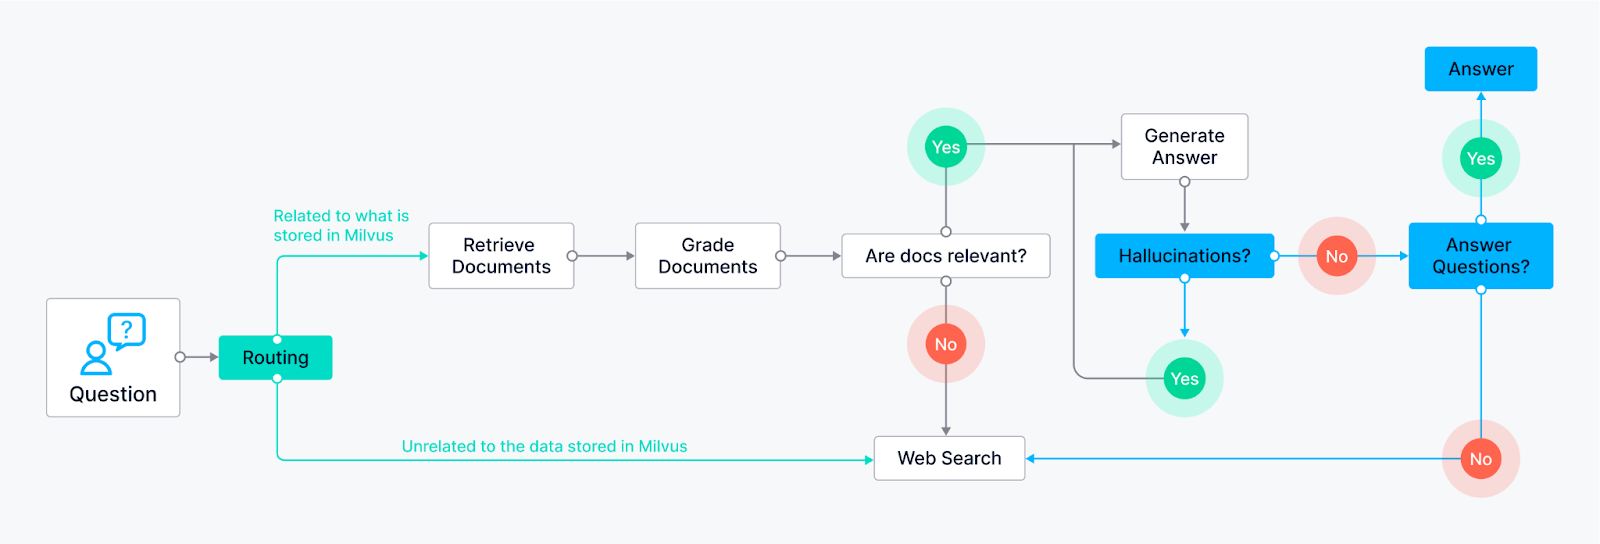

# Referências

https://platform.openai.com/docs/api-reference/chat?lang=python

https://platform.openai.com/docs/overview

https://brains.dev/2024/controlando-seu-llm-parametros-de-inferencia/